In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols

In [12]:
import pandas as pd
CrimesDf = pd.read_excel('2020_2023_CRV')

In [13]:
CrimesDf.shape
CrimesDf.info

<bound method DataFrame.info of                      Date                                  Event Description  \
0         #date +occurred                                                NaN   
1     2023-08-10 00:00:00  August 2023: In South Kivu province, two women...   
2     2023-08-08 00:00:00  August 2023: In Tanganyika province, an unspec...   
3     2023-08-08 00:00:00  August 2023: In Tanganyika province, an unspec...   
4     2023-08-05 00:00:00  August 2023: In North Kivu province, a woman w...   
...                   ...                                                ...   
1013  2020-01-31 00:00:00  January 2020: In North Darfur state, six women...   
1014  2020-01-16 00:00:00  January 2020: In North Darfur state, a young g...   
1015  2020-01-11 00:00:00  January 2020: In the outskirts of Yei city, Ye...   
1016  2020-01-07 00:00:00  January 2020: In Lakes state, three girls betw...   
1017  2020-01-01 00:00:00  September 2020: In Uttar Pradesh state, a teac...   

       

In [14]:
CrimesDf.isnull().sum()

Date                                               0
Event Description                                  1
Country                                            0
Country ISO                                        0
Admin 1                                            0
Latitude                                           2
Longitude                                          2
Geo Precision                                      1
Location Where Sexual Violence Was Committed       0
Reported Perpetrator                               0
Perpetrator Group Name                             0
Single And Group Perpetrators                      0
Weapon Carried/Used                                0
Survivor or Victim                                 0
Survivor Or Victim Sex                             0
Adult or Minor                                     0
Type                                               0
SV Context                                        12
Classification                                

In [15]:
Crimes1 = CrimesDf.dropna()
print(Crimes1)

                    Date                                  Event Description  \
4    2023-08-05 00:00:00  August 2023: In North Kivu province, a woman w...   
14   2023-07-16 00:00:00  July 2023: In Abia state, a 53-year-old womanâ...   
19   2023-07-08 00:00:00  July 2023: In Ituri province, a woman was rape...   
38   2023-06-19 00:00:00  June 2023: In an unspecified location, three w...   
51   2023-06-15 00:00:00  June 2023: In West Darfur state, three teenage...   
..                   ...                                                ...   
916  2020-10-03 00:00:00  October 2020: In Warrap state, a 16 year-old g...   
918  2020-09-21 00:00:00  September 2020: In Central Darfur state, a 41-...   
970  2020-06-01 00:00:00  June 2020: In Donetsk Oblast, a Donetsk People...   
971  2020-05-31 00:00:00  May 2020: The body of a hospital employee was ...   
975  2020-05-08 00:00:00  May 2020: In Western Uganda region, a woman wa...   

         Country Country ISO          Admin 1   Lat

In [16]:
Crimes1.isnull().sum()

Date                                             0
Event Description                                0
Country                                          0
Country ISO                                      0
Admin 1                                          0
Latitude                                         0
Longitude                                        0
Geo Precision                                    0
Location Where Sexual Violence Was Committed     0
Reported Perpetrator                             0
Perpetrator Group Name                           0
Single And Group Perpetrators                    0
Weapon Carried/Used                              0
Survivor or Victim                               0
Survivor Or Victim Sex                           0
Adult or Minor                                   0
Type                                             0
SV Context                                       0
Classification                                   0
Number of Reported Victims     

In [17]:
df = pd.DataFrame(Crimes1)
print(df)

                    Date                                  Event Description  \
4    2023-08-05 00:00:00  August 2023: In North Kivu province, a woman w...   
14   2023-07-16 00:00:00  July 2023: In Abia state, a 53-year-old womanâ...   
19   2023-07-08 00:00:00  July 2023: In Ituri province, a woman was rape...   
38   2023-06-19 00:00:00  June 2023: In an unspecified location, three w...   
51   2023-06-15 00:00:00  June 2023: In West Darfur state, three teenage...   
..                   ...                                                ...   
916  2020-10-03 00:00:00  October 2020: In Warrap state, a 16 year-old g...   
918  2020-09-21 00:00:00  September 2020: In Central Darfur state, a 41-...   
970  2020-06-01 00:00:00  June 2020: In Donetsk Oblast, a Donetsk People...   
971  2020-05-31 00:00:00  May 2020: The body of a hospital employee was ...   
975  2020-05-08 00:00:00  May 2020: In Western Uganda region, a woman wa...   

         Country Country ISO          Admin 1   Lat

In [30]:
df_clean = df[['Country','Location Where Sexual Violence Was Committed','Reported Perpetrator','Perpetrator Group Name',
              'Single And Group Perpetrators','Weapon Carried/Used','Survivor or Victim','Survivor Or Victim Sex',
               'Type','Classification','Number of Reported Victims','Reported Deaths Following the Sexual Violence']]
df_clean.head()

,Country,Location Where Sexual Violence Was Committed,Reported Perpetrator,Perpetrator Group Name,Single And Group Perpetrators,Weapon Carried/Used,Survivor or Victim,Survivor Or Victim Sex,Type,Classification,Number of Reported Victims,Reported Deaths Following the Sexual Violence
4,DRC,No Information,NSA,March 23 Movement,Group Perpetrator,Firearms,Civilian,Female,ThreatOfSexualViolence,Intimation,1,1.0
14,Nigeria,"Street, Road or Field",No Information,Unidentified Armed Actor,Group Perpetrator,Firearms,Civilian,Female,Rape,Gang SV Assault,1,1.0
19,DRC,No Information,NSA,Unidentified Armed Actor,Group Perpetrator,Firearms,Civilian,Female,Rape,Gang SV Assault,1,1.0
38,Sudan,No Information,Vigilante,Rapid Support Forces,Group Perpetrator,Firearms,Civilian,Female,Rape,Mass SV Assault,3,3.0
51,Sudan,"Street, Road or Field",Vigilante,Rapid Support Forces,Group Perpetrator,Firearms,Civilian,Female,AttemptedSexualAssault,Mass SV Assault,3,3.0


In [32]:
import pandas as pd
#Read the dataframe
df =  df_clean

#Group the data by column "market_cap_usd" and compute the mean of the column "price_btc" for each group
df_grouped = df.groupby("Reported Deaths Following the Sexual Violence")["Number of Reported Victims"].mean()
df_aggregated = df.groupby("Number of Reported Victims").agg({"Reported Deaths Following the Sexual Violence"
                                                              :["mean", "std"]})
#Compute the rolling average of a data frame with a window the size of 2
df_rolling = df.rolling(window=2).mean()
print(df_rolling)

     Reported Deaths Following the Sexual Violence
4                                              NaN
14                                             1.0
19                                             1.0
38                                             2.0
51                                             3.0
..                                             ...
916                                            1.0
918                                            1.0
970                                            1.0
971                                            1.0
975                                            1.0

[108 rows x 1 columns]


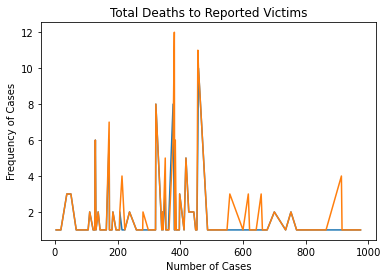

In [34]:
import matplotlib.pyplot as plt

#Plot the data
#plt.plot(df_clean.index, df_clean[["price_btc", "price_usd"]])
df["Reported Deaths Following the Sexual Violence"].plot()
df["Number of Reported Victims"].plot()

#Add labels and titles
plt.xlabel("Number of Cases")
plt.ylabel("Frequency of Cases")
plt.title("Total Deaths to Reported Victims")

#Show the plot
plt.show()

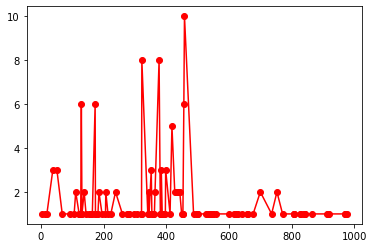

In [36]:
plt.plot(df_clean.index, df_clean["Reported Deaths Following the Sexual Violence"], "r-o")

<BarContainer object of 108 artists>

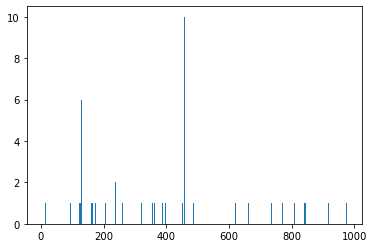

In [38]:
plt.bar(df_clean.index, df_clean['Reported Deaths Following the Sexual Violence'])

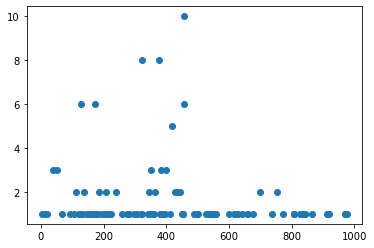

In [39]:
plt.scatter(df_clean.index, df_clean['Reported Deaths Following the Sexual Violence'])